In [67]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format',lambda x:"%0.5f" %x)

In [17]:
# declare the lists required to store our web scraped data
companies=[]
skills=[]
published_dates=[]
experiences=[]
locations=[]

In [18]:
# The job listings are based on the given role/designation
input_=input("Enter Designation: ")
li=input_.split(" ")
domain="%20".join(li)

Enter Designation: Data Scientist


In [31]:
# we have 25 job listed on a page
# iterating through 20 webpages
page_number=1
err='None'
while True:
    # The url is customised based on the role and no of pages to iterate. 
    url=f"https://www.timesjobs.com/candidate/job-search.html?from=submit&actualTxtKeywords={domain}&searchBy=0&rdoOperator=OR&searchType=personalizedSearch&luceneResultSize=25&postWeek=60&txtKeywords={domain}&pDate=I&sequence={page_number}&startPage=1"
    html_text=requests.get(url).text
    soup=BeautifulSoup(html_text,'lxml')
    jobs=soup.find_all('li',class_= 'clearfix job-bx wht-shd-bx')
    if str(err)=='None' and len(companies)<500:
        # Looping through each listed job
        for job in jobs:
            
            #An error occurs when either the specified role lacks job listings 
            #or we have reached the end of the job listing loop.
            err=job.find('span',class_='error-msg dflt-msg')
            company_name=job.find('h3',class_='joblist-comp-name').text.strip()
            skill=job.find('span',class_='srp-skills').text.strip()
            published_date=job.find('span',class_='sim-posted').span.text
            experience=job.find('ul',class_='top-jd-dtl clearfix').li.text[11:]
            location=job.find('ul',class_='top-jd-dtl clearfix').span.text
            
            #Storing the scraped data for every job listing
            companies.append(company_name)
            skills.append(skill)
            published_dates.append(published_date)
            experiences.append(experience)
            locations.append(location)
        page_number=page_number+1
    else:
        break

In [34]:
# storing in a pandas dataframe
ds_jobs = pd.DataFrame({
           "company_name":companies,
           "experience":experiences,
            "location" :locations,
            "skills":skills,
            "posted_at":published_dates})

In [35]:
# saving the stored data in .csv format
ds_jobs.to_csv("job_demand.csv")

In [36]:
# Reading our stored data
df=pd.read_csv("job_demand.csv")

In [37]:
df.drop(columns='Unnamed: 0',inplace=True)

In [38]:
df.head()

,company_name,experience,location,skills,posted_at
0,Armaco Chemical Processes Systems Pvt Ltd,0 - 3 yrs,Jeddah,"business system , infrastructure , data sc...",Posted 3 days ago
1,HyreFox Consultants,0 - 3 yrs,Jaipur,"data science , data cleaning , data scient...",Posted 5 days ago
2,Nielsen Research Ltd. Co.,4 - 7 yrs,Mumbai,"visualization , dashboards , tableau , d...",Posted few days ago
3,RedLotus,0 - 3 yrs,Mumbai,"data scientist , statistical modeling , da...",Posted few days ago
4,Armaco Chemical Processes Systems Pvt Ltd,3 - 7 yrs,Jeddah,"bi , sql , database , data science , d...",Posted 3 days ago


In [39]:
df.shape

(500, 5)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  500 non-null    object
 1   experience    500 non-null    object
 2   location      399 non-null    object
 3   skills        500 non-null    object
 4   posted_at     500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [41]:
df.describe(include=object)

,company_name,experience,location,skills,posted_at
count,500,500,399,500,500
unique,211,52,95,403,9
top,WALMART INDIA,0 - 3 yrs,Bengaluru / Bangalore,"image processing , algorithms , python , ...",Posted few days ago
freq,32,76,85,8,322


## Data Cleaning
1. Null values in location column is replaced by 'Not Mentioned' 
2. Duplicated are removed
3. Unwated escape characters are removed in company name column
4. The experience column has been converted to integer datatype
5. The hyphenated words in the location column were modified to form a single word
6. Escape characters in posted at column were removed 

In [42]:
df['location'].fillna('Not Mentioned',inplace=True)

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df['company_name'].unique()

array(['Armaco Chemical Processes Systems Pvt Ltd', 'HyreFox Consultants',
       'Nielsen Research Ltd. Co.', 'RedLotus', 'Datagrid Solutions',
       'RGF Professional', 'TERADATA INDIA PVT LTD',
       'TECHNOPARK TRIVANDRUM', 'Efftronics Systems Pvt Ltd',
       'BizViz Technologies', 'axmiyan hr solutions private limited',
       'g7 cr technologies', 'Informatica', 'Orange Business Services',
       'CONNECTING 2 WORK', 'Sumo Digital Ltd', 'PAGO Analytics',
       'string bio pvt. ltd', 'NLP People', 'BrainToSoul Consulting',
       'TandA HR Solutions', 'Cellworks', 'LogicPlum Private Limited',
       'ion trading india pvt. ltd.', 'demoport', 'nutanxt technologies',
       'aeries technology group  ( sabre industries )',
       'pratibha analytics',
       'Innoplexus Consulting Services Private Limited', 'GenieTalk',
       'ispatial techno solutions pvt ltd.', 'covalense global',
       'nielsensports', 'SRINSOFT TECHNOLOGIES',
       'Travel Centric Technology', 'alliance re

In [45]:
unwanted_string="\r\n     (More Jobs)"
df['company_name']=df['company_name'].apply(lambda x: x.replace(unwanted_string,"") if unwanted_string in x else x)

In [47]:
df['experience'].unique()

array(['0 - 3 yrs', '4 - 7 yrs', '3 - 7 yrs', '5 - 6 yrs', '7 - 10 yrs',
       '5 - 8 yrs', '3 - 5 yrs', '3 - 6 yrs', '1 - 4 yrs', '2 - 10 yrs',
       '2 - 5 yrs', '3 - 20 yrs', '4 - 8 yrs', '6 - 9 yrs', '3 - 4 yrs',
       '2 - 3 yrs', '1 - 2 yrs', '8 - 10 yrs', '5 - 7 yrs', '8 - 11 yrs',
       '7 - 8 yrs', '0 - 1 yrs', '10 - 15 yrs', '1 - 3 yrs', '5 - 9 yrs',
       '4 - 6 yrs', '10 - 13 yrs', '20 - 23 yrs', '3 - 10 yrs',
       '2 - 4 yrs', '8 - 12 yrs', '1 - 5 yrs', '5 - 10 yrs', '0 - 5 yrs',
       '20 - 25 yrs', '15 - 20 yrs', '7 - 15 yrs', '4 - 5 yrs',
       '10 - 12 yrs', '0 - 2 yrs', '25 - 30 yrs', '2 - 7 yrs',
       '5 - 11 yrs', '17 - 20 yrs', '6 - 8 yrs', '12 - 15 yrs',
       '2 - 6 yrs', '15 - 18 yrs', '3 - 8 yrs', '2 - 8 yrs', '4 - 10 yrs',
       '6 - 10 yrs'], dtype=object)

In [48]:
def clean_experience(data):
    data=data[:-4].split('-')
    mean=round((int(data[0])+int(data[1]))/2)
    return mean

In [49]:
df['experience']=df['experience'].apply(lambda x:clean_experience(x))

In [50]:
df['location'].unique()

array(['Jeddah', 'Jaipur', 'Mumbai', 'Pune', 'Not Mentioned', 'Japan',
       'Thiruvananthapuram', 'Vijayawada',
       'Hyderabad/Secunderabad,  Bengaluru / Bangalore', 'Gurgaon',
       'Bengaluru / Bangalore', 'Hyderabad/Secunderabad', 'Canada',
       'France', 'Panchkula', 'Italy', 'Chennai',
       'Hyderabad/Secunderabad,  Mumbai,  Bengaluru / Bangalore',
       'Indore', 'Noida/Greater Noida', 'Malaysia', 'Ahmedabad',
       'Gurgaon,  Chennai', 'Delhi,  Delhi/NCR,  Bengaluru / Bangalore',
       'Nagpur', 'New York City', 'Chandigarh',
       'Nepal,  Netherlands,  New Zealand,  Norway,  Pakistan',
       'Malda,  Midnapur,  Raniganj,  Siliguri,  France',
       'Bhilai-Durg,  Bilaspur,  Anand,  Ankleshwar,  Bharuch',
       'Nizamabad,  Ongole,  Tezpur,  Tinsukia,  Patna',
       'Mumbai,  Latur,  Lonavala,  Mahabaleshwar,  Nagpur',
       'Hissar,  Jhajjar,  Jind,  Kaithal,  Karnal',
       'Ambala,  Bhiwani,  Gondia,  Hinganghat,  Kalyan',
       'Ahmedabad,  Chandigarh,  

In [51]:
def clean_location(data):
    location_dict={'Hyderabad/Secunderabad':'Hyderabad','Bengaluru / Bangalore':'Bangalore',
                       'Delhi/NCR':'Delhi','Varanasi / Banaras':'Varanasi','Calicut/ Kozhikode':'Calicut',
                       'Cochin/ Kochi/ Ernakulam':'Cochin','Noida/Greater Noida':'Noida','Navi Mumbai':'Mumbai',
                       'Other City(s) in Uttaranchal':'','Other City(s) in Punjab':'','Other City(s) in Uttar Pradesh':'',
                       'Other City(s) in Andhra Pradesh':'','Other City(s) in Rajasthan':'','Other City(s) in West Bengal':'',
                       'Panjim/Panaji':'Goa','Mysoru / Mysore':'Mysore'}
    data_list=data.split(",")
    for i in range(len(data_list)):
        j=data_list[i].strip()
        if j in location_dict.keys():
            data_list[i]=location_dict[j]
        else:
            data_list[i]=data_list[i].strip()
    data=','.join(data_list)
    return data
    

In [52]:
df['location']=df['location'].apply(lambda x: clean_location(x))

In [53]:
df['posted_at']=df['posted_at'].replace({'\nWork from Home \r\n\t\t    \t':'Work from Home'})

In [54]:
df.head()

,company_name,experience,location,skills,posted_at
0,Armaco Chemical Processes Systems Pvt Ltd,2,Jeddah,"business system , infrastructure , data sc...",Posted 3 days ago
1,HyreFox Consultants,2,Jaipur,"data science , data cleaning , data scient...",Posted 5 days ago
2,Nielsen Research Ltd. Co.,6,Mumbai,"visualization , dashboards , tableau , d...",Posted few days ago
3,RedLotus,2,Mumbai,"data scientist , statistical modeling , da...",Posted few days ago
4,Armaco Chemical Processes Systems Pvt Ltd,5,Jeddah,"bi , sql , database , data science , d...",Posted 3 days ago


In [55]:
df.reset_index(drop=True,inplace=True)

## Data Analysis and Visualization
### We are finding out 3 things in this analysis
1. What years of experience are employers looking for?
2. List of top 30 on demand skills for the specific role
3. Which locations offer better opportunities for the specific role?

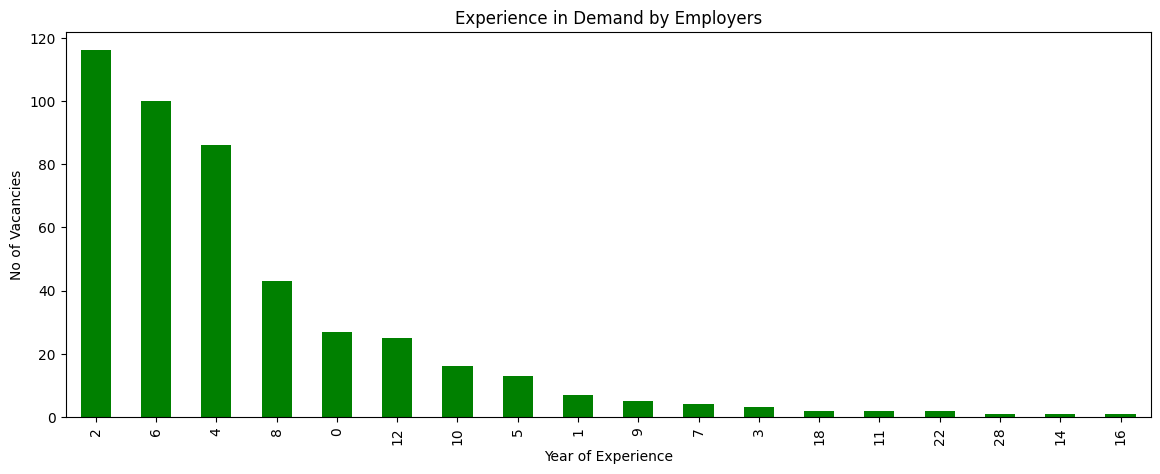

In [57]:
#1. What years of experience are employers looking for?
plt.figure(figsize=(14,5))
df['experience'].value_counts().plot(kind='bar',color="g") 
plt.xlabel('Year of Experience')
plt.ylabel('No of Vacancies')
plt.title('Experience in Demand by Employers')
plt.show()

In [58]:
#2.What are the required skils to become a data scientist
series=df.skills.apply(pd.Series).stack()

In [59]:
skills_list = series.str.split(',')
skills = [skill.strip() for sublist in skills_list for skill in sublist]

In [60]:
skillset=pd.Series(skills).value_counts()[:30]

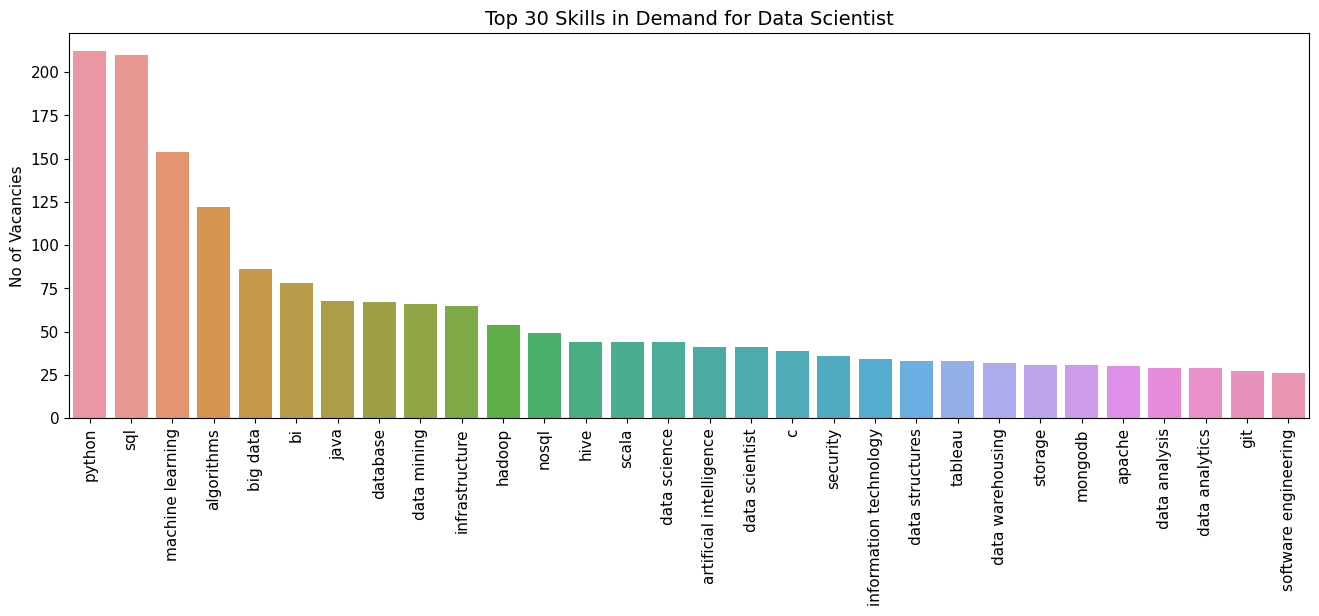

In [61]:
plt.figure(figsize=(16,5))
sns.barplot(x=skillset.index,y=skillset.values)
plt.xticks(rotation=90,fontsize=11)
plt.yticks(fontsize=11)
plt.title(f'Top 30 Skills in Demand for {input_.title()}',fontsize=14)
plt.ylabel('No of Vacancies',fontsize=11)
plt.show()

In [62]:
#3. Which locations offer better opportunities for data scientist role

In [63]:
s=df.location.apply(pd.Series).stack()

In [64]:
location_list = s.str.split(',')
loc = [place.strip() for sublist in location_list for place in sublist]

In [65]:
location_set=pd.Series(loc).value_counts()[:7]

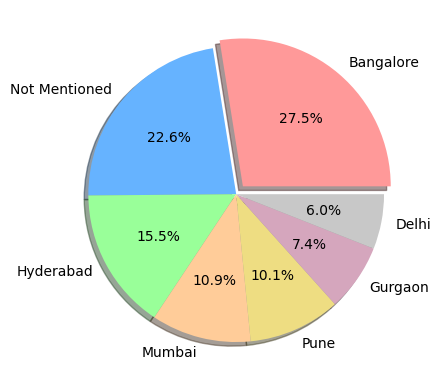

In [66]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#eedd82','#d5a6bd','#c8c8c8']
plt.pie(location_set,labels=location_set.index,autopct='%1.1f%%',explode=(0.07,0,0,0,0,0,0),shadow=True,colors=colors)
plt.show()